# Data Load

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\ManosIeronymakisProb\OneDrive - Probability\Bureaublad\meta data")

#load the filepaths
filepath1 = "GWI_JPMORGAN.xlsx"
filepath2 = "GWI_META.csv"
filepath3= "GWI_NVDIA.xlsx"
filepath4= "GWI_VISA.xlsx"
filepath5= "corellation_data.xlsx"

#load the dataframes
GWI_JP = pd.read_excel(filepath1)
GWI_META = pd.read_csv(filepath2)
GWI_NVDIA = pd.read_excel(filepath3)
GWI_VISA = pd.read_excel(filepath4)

# Green whasing indicator for Visa

    year   Slow_ESG   Fast_ESG     Slow_E   Fast_E     Slow_S   Fast_S  \
0   2012  28.834287  79.401426  24.105032  80.0167  30.070820  74.5198   
1   2013  25.040347  83.671324  24.264580  79.6604  30.609948  82.5515   
2   2014  23.325309  67.587354  24.667096  55.3376  40.501804  80.4735   
3   2015  20.651824  69.836362  31.821976  59.0506  47.112019  79.3483   
4   2016  51.109626  74.801162  36.391810  71.3477  71.523614  82.6341   
5   2017  51.780170  83.534154  43.512918  85.1093  75.424576  83.0694   
6   2018  70.543274  90.085399  48.937500  91.7225  75.807802  90.6324   
7   2019  71.886315  87.766455  47.515240  85.0814  74.890342  89.4273   
8   2020  70.396804  88.250150  50.352355  95.6550  74.972651  88.8476   
9   2021  58.425272  90.328068  50.530729  93.0084  74.342238  89.0771   
10  2022  52.962326  87.929571  49.541063  84.3417  73.245957  85.4018   

       Slow_G   Fast_G  Fast_ESGC     Fast_C  
0   17.282757  83.6429  45.655174  11.988451  
1   10.992946  88

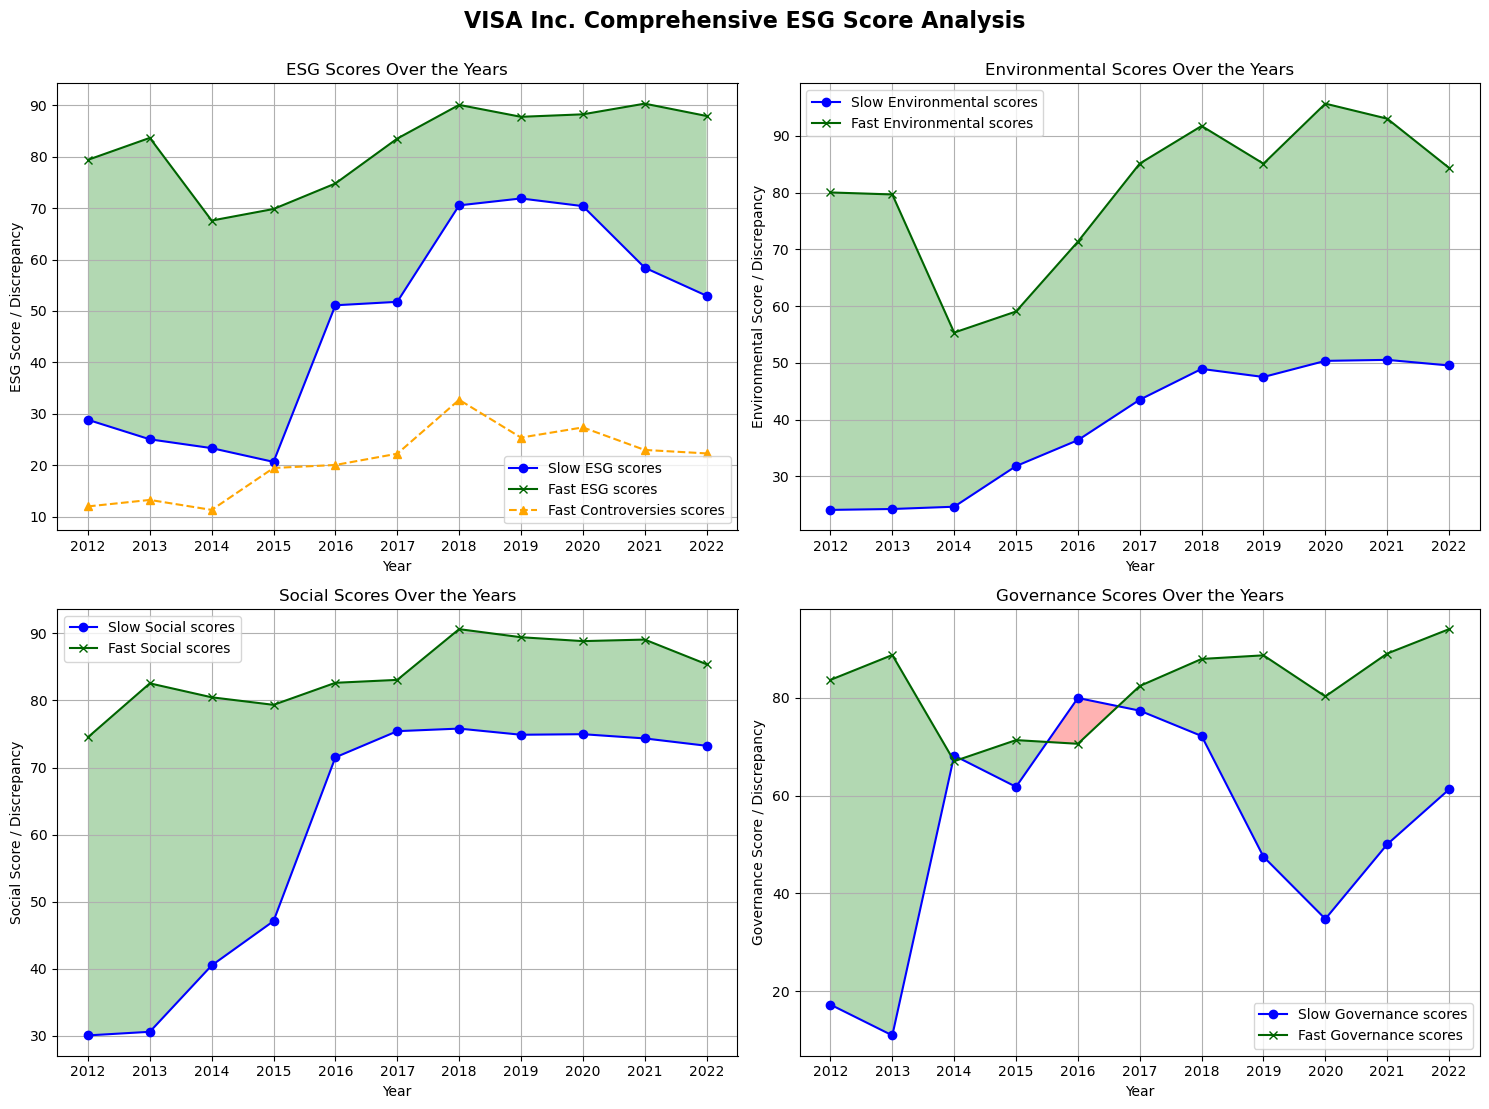

In [11]:
print(GWI_VISA)

# Initialize a figure for plotting
plt.figure(figsize=(15, 12))  # Adjust figure size to better accommodate the 2x2 grid and title

# Plotting ESG and other categories with full names
categories = ['ESG', 'Environmental', 'Social', 'Governance']

for i, category in enumerate(categories):
    ax = plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns, subplot i+1
    # Adjusting the plotting and labeling for each category
    if category == 'ESG':
        plt.plot(GWI_VISA['year'], GWI_VISA['Slow_ESG'], label='Slow ESG scores', color='blue', marker='o')
        plt.plot(GWI_VISA['year'], GWI_VISA['Fast_ESG'], label='Fast ESG scores', color='darkgreen', marker='x')
        # Adding Controversies score to the ESG plot
        plt.plot(GWI_VISA['year'], GWI_VISA['Fast_C'], label='Fast Controversies scores', color='orange', linestyle='--', marker='^')
    else:
        # Adjust data column names based on full category names
        plt.plot(GWI_VISA['year'], GWI_VISA[f'Slow_{category[0]}'], label=f'Slow {category} scores', color='blue', marker='o')
        plt.plot(GWI_VISA['year'], GWI_VISA[f'Fast_{category[0]}'], label=f'Fast {category} scores', color='darkgreen', marker='x')

    # Fill the area between the lines
    plt.fill_between(GWI_VISA['year'], GWI_VISA[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG'], 
                     GWI_VISA[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'],
                     where=(GWI_VISA[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'] >= GWI_VISA[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG']),
                     facecolor='green', alpha=0.3, interpolate=True)
    plt.fill_between(GWI_VISA['year'], GWI_VISA[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG'], 
                     GWI_VISA[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'],
                     where=(GWI_VISA[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'] < GWI_VISA[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG']),
                     facecolor='red', alpha=0.3, interpolate=True)

    plt.title(f'{category} Scores Over the Years')
    plt.xlabel('Year')
    plt.ylabel(f'{category} Score / Discrepancy')
    plt.xticks(GWI_VISA['year'])
    plt.grid(True)
    plt.legend()

# Adding a central title over all subplots
plt.suptitle('VISA Inc. Comprehensive ESG Score Analysis', fontsize=16, fontweight='bold', y=0.95)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()

# Green whasing indicator for JP Morgan

    year   Slow_ESG   Fast_ESG     Slow_E   Fast_E     Slow_S   Fast_S  \
0   2012  63.307684  52.193198  75.052404  41.7642  81.850494  57.6548   
1   2013  66.479167  48.371520  75.832602  39.4315  76.955486  43.4756   
2   2014  72.664470  68.285030  74.705651  76.6919  73.508567  63.6583   
3   2015  71.376277  76.923202  80.257885  81.0758  80.663965  73.7903   
4   2016  71.365904  77.583793  81.766775  79.7628  88.334512  79.0866   
5   2017  77.841928  81.951244  83.033942  86.0974  90.898448  82.1020   
6   2018  81.521252  86.501700  58.416073  86.2785  86.439670  91.9029   
7   2019  85.674892  86.449795  82.275107  83.7716  83.928501  87.6657   
8   2020  79.659578  81.899783  81.664584  87.0874  85.642735  72.7961   
9   2021  83.916630  82.353150  83.718157  88.2557  80.742026  77.7992   
10  2022  85.541523  66.800225  78.852333  73.4132  77.155705  83.1722   

       Slow_G   Fast_G  Fast_ESGC     Fast_C  
0   64.462437  57.2628  34.553538  16.844204  
1   67.190139  62

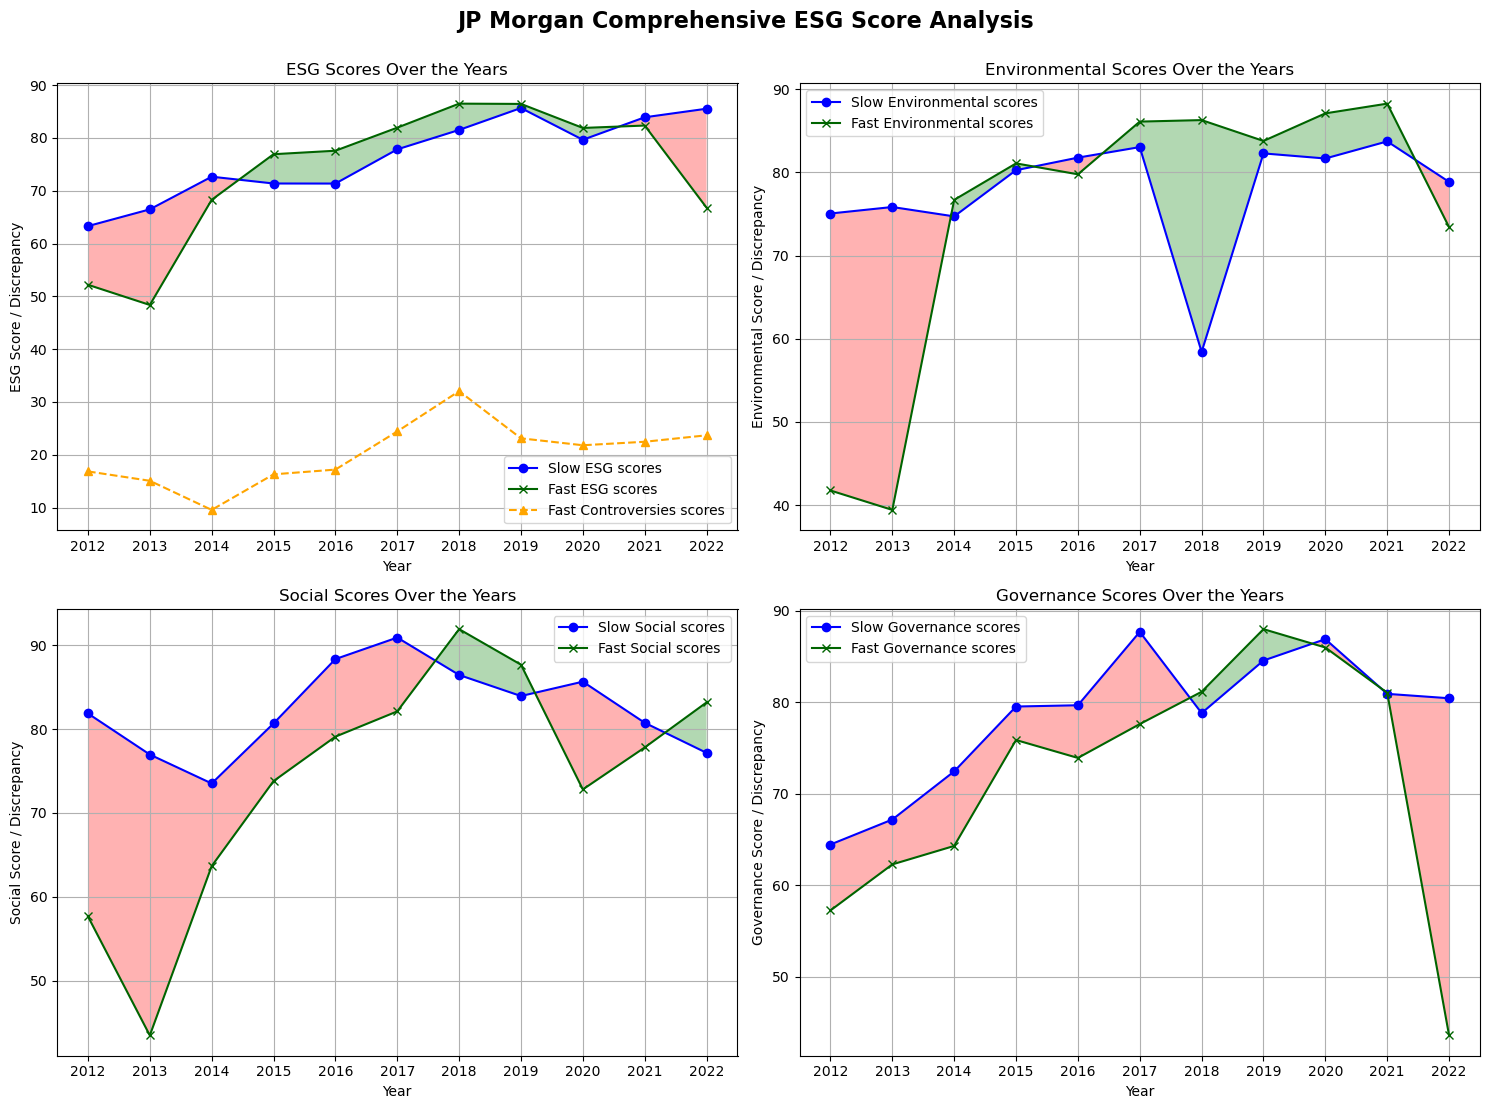

In [17]:
print(GWI_JP)

# Initialize a figure for plotting
plt.figure(figsize=(15, 12))  # Adjust figure size to better accommodate the 2x2 grid and title

# Plotting ESG and other categories with full names
categories = ['ESG', 'Environmental', 'Social', 'Governance']

for i, category in enumerate(categories):
    ax = plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns, subplot i+1
    # Adjusting the plotting and labeling for each category
    if category == 'ESG':
        plt.plot(GWI_JP['year'], GWI_JP['Slow_ESG'], label='Slow ESG scores', color='blue', marker='o')
        plt.plot(GWI_JP['year'], GWI_JP['Fast_ESG'], label='Fast ESG scores', color='darkgreen', marker='x')
        # Adding Controversies score to the ESG plot
        plt.plot(GWI_JP['year'], GWI_JP['Fast_C'], label='Fast Controversies scores', color='orange', linestyle='--', marker='^')
    else:
        # Adjust data column names based on full category names
        plt.plot(GWI_JP['year'], GWI_JP[f'Slow_{category[0]}'], label=f'Slow {category} scores', color='blue', marker='o')
        plt.plot(GWI_JP['year'], GWI_JP[f'Fast_{category[0]}'], label=f'Fast {category} scores', color='darkgreen', marker='x')

    # Fill the area between the lines
    plt.fill_between(GWI_JP['year'], GWI_JP[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG'], 
                     GWI_JP[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'],
                     where=(GWI_JP[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'] >= GWI_JP[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG']),
                     facecolor='green', alpha=0.3, interpolate=True)
    plt.fill_between(GWI_JP['year'], GWI_JP[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG'], 
                     GWI_JP[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'],
                     where=(GWI_JP[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'] < GWI_JP[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG']),
                     facecolor='red', alpha=0.3, interpolate=True)

    plt.title(f'{category} Scores Over the Years')
    plt.xlabel('Year')
    plt.ylabel(f'{category} Score / Discrepancy')
    plt.xticks(GWI_JP['year'])
    plt.grid(True)
    plt.legend()

# Adding a central title over all subplots
plt.suptitle('JP Morgan Comprehensive ESG Score Analysis', fontsize=16, fontweight='bold', y=0.95)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()

# Green whasing indicator for NVIDIA

    year   Slow_ESG   Fast_ESG     Slow_E   Fast_E     Slow_S   Fast_S  \
0   2012  57.015501  49.535962  61.445602  64.5559  45.623563  46.7459   
1   2013  63.477940  70.996295  65.554726  79.1365  70.744152  64.4183   
2   2014  75.877446  71.624517  69.168635  81.1310  75.944402  61.7401   
3   2015  78.289599  77.209747  71.598669  82.7202  66.234016  69.0325   
4   2016  74.462253  75.523084  71.277005  73.5574  65.014689  83.9103   
5   2017  73.309866  71.375953  72.314974  47.3646  73.264820  84.7802   
6   2018  77.017913  78.727852  72.418631  63.3276  69.792183  85.6361   
7   2019  75.762493  74.144819  73.332496  75.7530  66.234101  78.4538   
8   2020  74.320855  81.429631  70.404736  80.5328  82.571574  83.7961   
9   2021  78.885806  78.744687  69.397770  79.7794  79.732045  77.3420   
10  2022  76.606671  80.708743  67.357604  76.5748  73.850905  79.8929   

       Slow_G   Fast_G  Fast_ESGC     Fast_C  
0   95.376467  37.1591  32.368111  15.193492  
1   96.734644  69

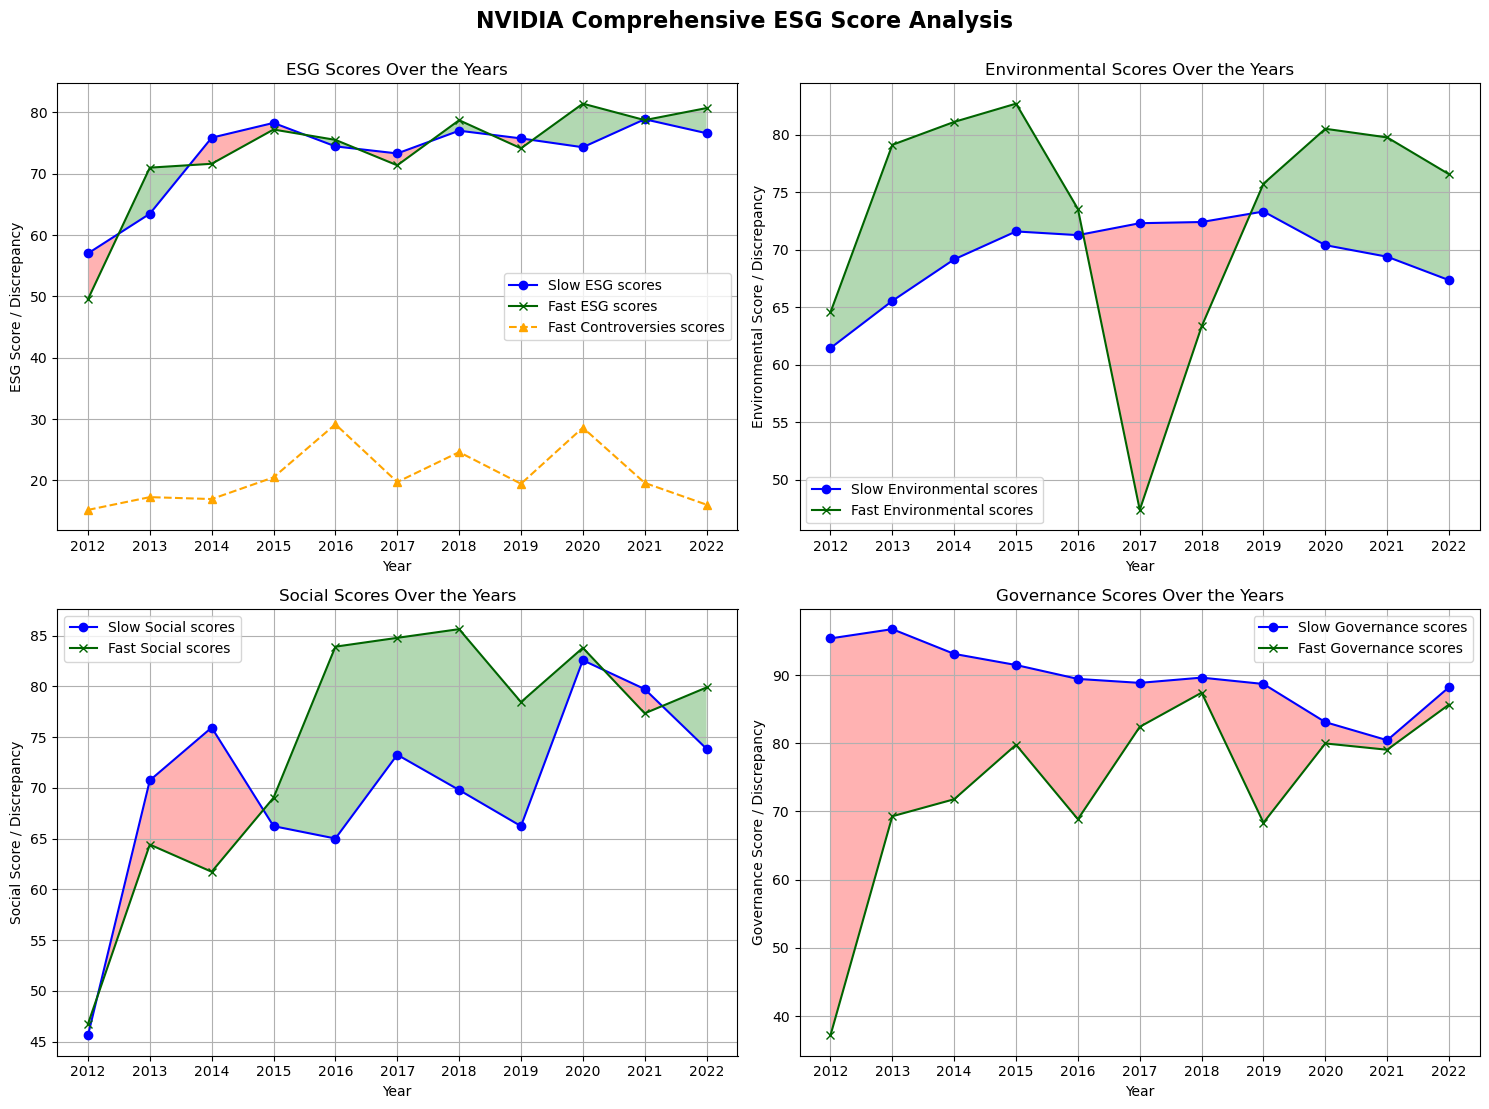

In [18]:
print(GWI_NVDIA)

# Initialize a figure for plotting
plt.figure(figsize=(15, 12))  # Adjust figure size to better accommodate the 2x2 grid and title

# Plotting ESG and other categories with full names
categories = ['ESG', 'Environmental', 'Social', 'Governance']

for i, category in enumerate(categories):
    ax = plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns, subplot i+1
    # Adjusting the plotting and labeling for each category
    if category == 'ESG':
        plt.plot(GWI_NVDIA['year'], GWI_NVDIA['Slow_ESG'], label='Slow ESG scores', color='blue', marker='o')
        plt.plot(GWI_NVDIA['year'], GWI_NVDIA['Fast_ESG'], label='Fast ESG scores', color='darkgreen', marker='x')
        # Adding Controversies score to the ESG plot
        plt.plot(GWI_NVDIA['year'], GWI_NVDIA['Fast_C'], label='Fast Controversies scores', color='orange', linestyle='--', marker='^')
    else:
        # Adjust data column names based on full category names
        plt.plot(GWI_NVDIA['year'], GWI_NVDIA[f'Slow_{category[0]}'], label=f'Slow {category} scores', color='blue', marker='o')
        plt.plot(GWI_NVDIA['year'], GWI_NVDIA[f'Fast_{category[0]}'], label=f'Fast {category} scores', color='darkgreen', marker='x')

    # Fill the area between the lines
    plt.fill_between(GWI_NVDIA['year'], GWI_NVDIA[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG'], 
                     GWI_NVDIA[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'],
                     where=(GWI_NVDIA[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'] >= GWI_NVDIA[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG']),
                     facecolor='green', alpha=0.3, interpolate=True)
    plt.fill_between(GWI_NVDIA['year'], GWI_NVDIA[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG'], 
                     GWI_NVDIA[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'],
                     where=(GWI_NVDIA[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'] < GWI_NVDIA[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG']),
                     facecolor='red', alpha=0.3, interpolate=True)

    plt.title(f'{category} Scores Over the Years')
    plt.xlabel('Year')
    plt.ylabel(f'{category} Score / Discrepancy')
    plt.xticks(GWI_NVDIA['year'])
    plt.grid(True)
    plt.legend()

# Adding a central title over all subplots
plt.suptitle('NVIDIA Comprehensive ESG Score Analysis', fontsize=16, fontweight='bold', y=0.95)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


# Green whasing indicator for META

    year  Slow_ESG   Fast_ESG  Slow_E     Fast_E  Slow_S     Fast_S  Slow_G  \
0   2012    29.618  66.687846  27.091  78.326442  53.000  36.466984  10.242   
1   2013    32.853  66.669222  27.508  77.091247  55.891  39.561918  14.619   
2   2014    32.382  65.546215  30.860  78.362167  53.542  40.566070  14.617   
3   2015    35.675  67.801928  34.995  80.997157  49.976  40.762641  23.564   
4   2016    35.159  62.769175  36.218  72.084238  50.886  36.675407  21.299   
5   2017    53.432  46.191733  37.412  66.534455  58.100  14.080048  54.219   
6   2018    43.115  42.062085  40.637  70.204751  59.522   6.985281  29.731   
7   2019    48.795  32.231995  48.582  61.206271  59.019   7.404965  40.054   
8   2020    61.468  29.086753  49.491  60.905553  59.201   6.590506  67.015   
9   2021    64.241  27.024247  49.335  68.547398  64.336   1.716792  68.631   
10  2022    66.993  17.673288  74.019  30.523036  61.636   3.554287  69.499   

       Fast_G  Fast_ESGC     Fast_C  
0   85.146456

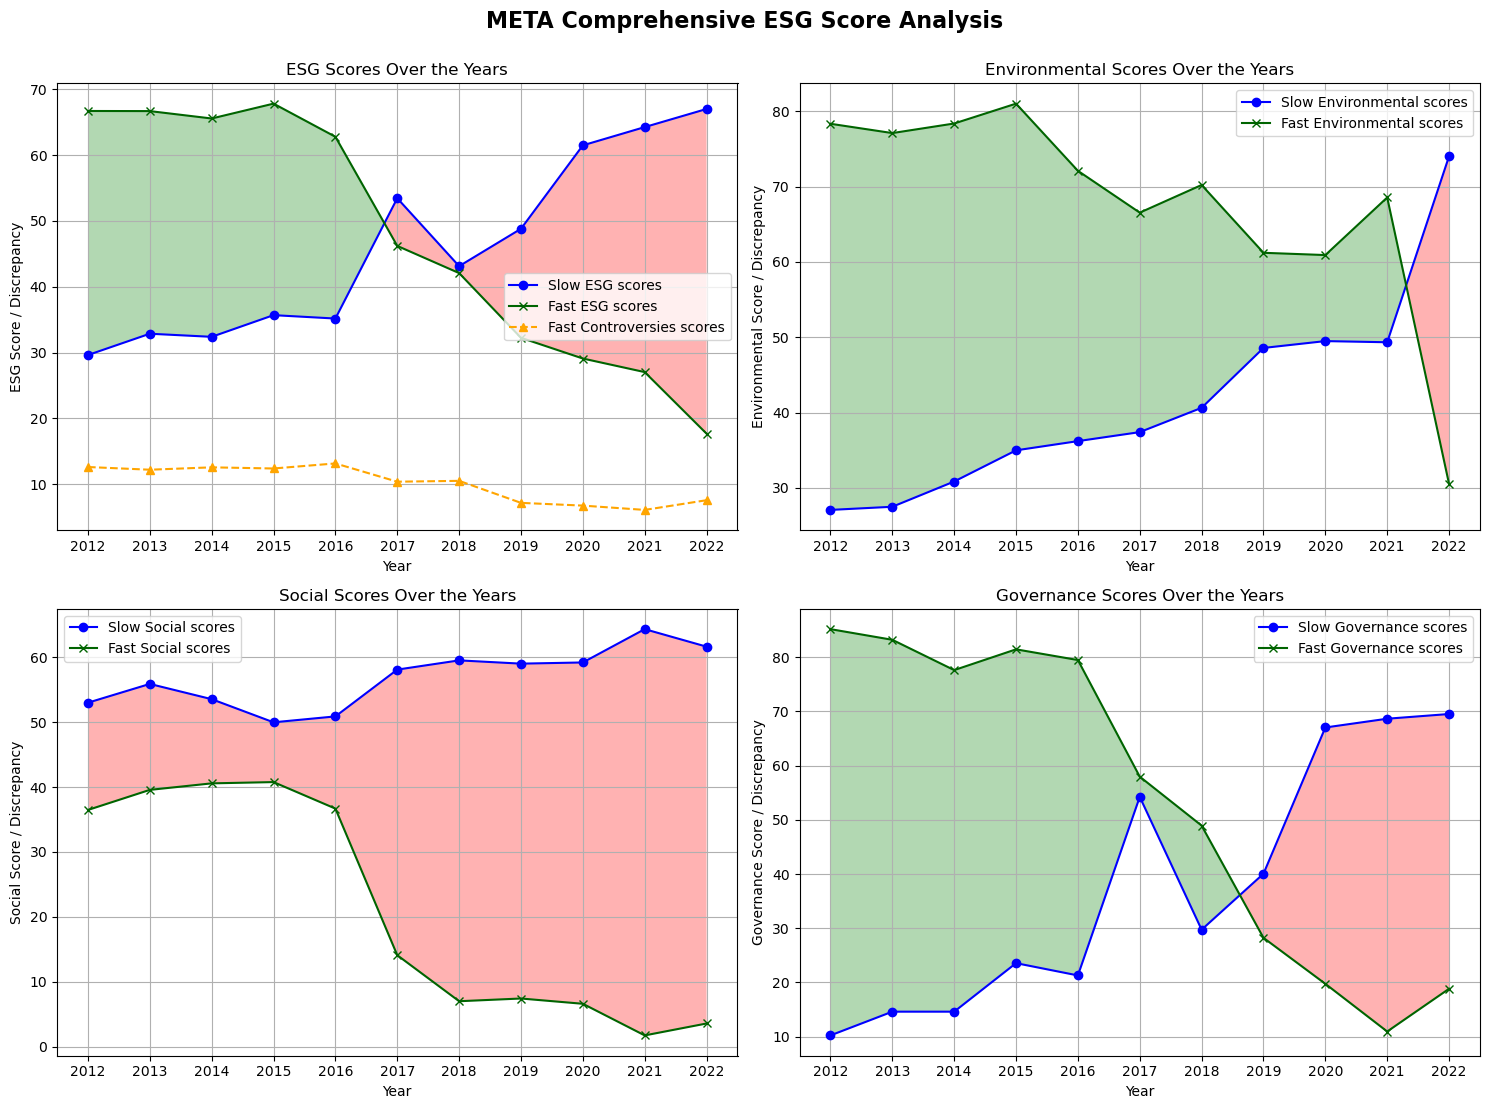

In [19]:
print(GWI_META)

# Initialize a figure for plotting
plt.figure(figsize=(15, 12))  # Adjust figure size to better accommodate the 2x2 grid and title

# Plotting ESG and other categories with full names
categories = ['ESG', 'Environmental', 'Social', 'Governance']

for i, category in enumerate(categories):
    ax = plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns, subplot i+1
    # Adjusting the plotting and labeling for each category
    if category == 'ESG':
        plt.plot(GWI_META['year'], GWI_META['Slow_ESG'], label='Slow ESG scores', color='blue', marker='o')
        plt.plot(GWI_META['year'], GWI_META['Fast_ESG'], label='Fast ESG scores', color='darkgreen', marker='x')
        # Adding Controversies score to the ESG plot
        plt.plot(GWI_META['year'], GWI_META['Fast_C'], label='Fast Controversies scores', color='orange', linestyle='--', marker='^')
    else:
        # Adjust data column names based on full category names
        plt.plot(GWI_META['year'], GWI_META[f'Slow_{category[0]}'], label=f'Slow {category} scores', color='blue', marker='o')
        plt.plot(GWI_META['year'], GWI_META[f'Fast_{category[0]}'], label=f'Fast {category} scores', color='darkgreen', marker='x')

    # Fill the area between the lines
    plt.fill_between(GWI_META['year'], GWI_META[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG'], 
                     GWI_META[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'],
                     where=(GWI_META[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'] >= GWI_META[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG']),
                     facecolor='green', alpha=0.3, interpolate=True)
    plt.fill_between(GWI_META['year'], GWI_META[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG'], 
                     GWI_META[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'],
                     where=(GWI_META[f'Fast_{category[0]}' if category != 'ESG' else 'Fast_ESG'] < GWI_META[f'Slow_{category[0]}' if category != 'ESG' else 'Slow_ESG']),
                     facecolor='red', alpha=0.3, interpolate=True)

    plt.title(f'{category} Scores Over the Years')
    plt.xlabel('Year')
    plt.ylabel(f'{category} Score / Discrepancy')
    plt.xticks(GWI_META['year'])
    plt.grid(True)
    plt.legend()

# Adding a central title over all subplots
plt.suptitle('META Comprehensive ESG Score Analysis', fontsize=16, fontweight='bold', y=0.95)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


